In [1]:
# Importing liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data spliting
from sklearn.model_selection import train_test_split

# hyperParameter tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Model importing for classification problem
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metric to measure model avaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import f1_score

# For all features and all rows
from IPython.display import display
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# To ignore wrnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
diabetes_df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
467,0,97,64,36,100,36.8,0.600,25,0
84,5,137,108,0,0,48.8,0.227,37,1
729,2,92,52,0,0,30.1,0.141,22,0
339,7,178,84,0,0,39.9,0.331,41,1
629,4,94,65,22,0,24.7,0.148,21,0


In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Feature engineeing

<AxesSubplot:>

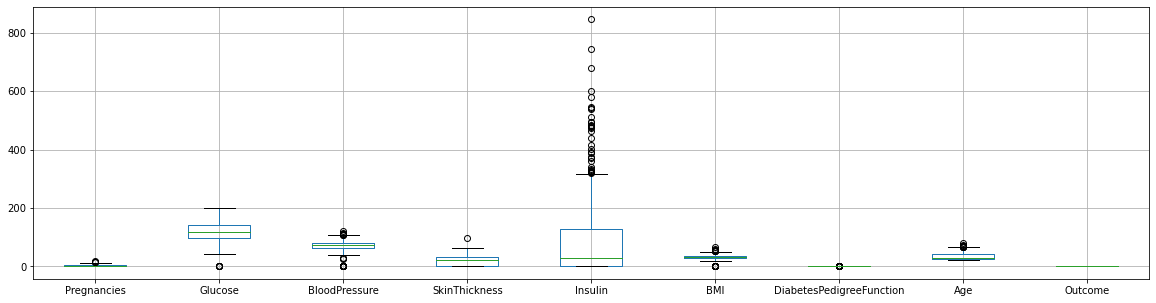

In [9]:
diabetes_df.boxplot(figsize=(20,5))

##### 1. Pregnancies

<AxesSubplot:>

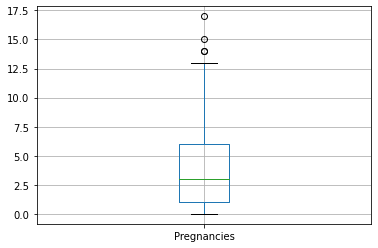

In [10]:
diabetes_df[['Pregnancies']].boxplot()

<AxesSubplot:xlabel='Pregnancies'>

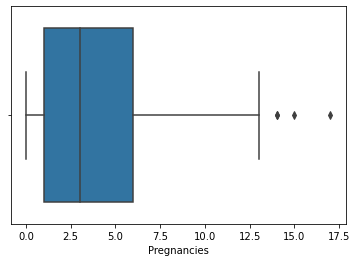

In [11]:
sns.boxplot(diabetes_df['Pregnancies'])

In [12]:
diabetes_df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [13]:
q1 = 1.00
q3 = 6.00
iqr = q3 - q1
lower_tail = q1 - (1.5*iqr)
upper_tail = q3 + (1.5*iqr)

In [14]:
mean = diabetes_df['Pregnancies'].loc[(diabetes_df['Pregnancies']<=upper_tail)].mean()
mean

3.7866492146596857

In [15]:
diabetes_df['Pregnancies'].loc[(diabetes_df['Pregnancies']>upper_tail)] = mean

<AxesSubplot:xlabel='Pregnancies'>

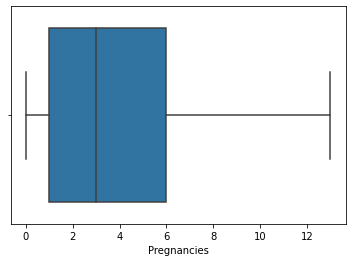

In [16]:
sns.boxplot(diabetes_df['Pregnancies'])

<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

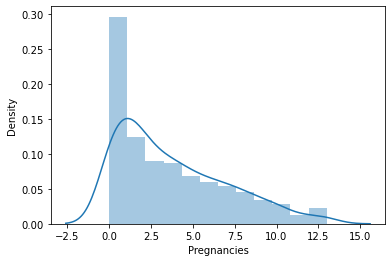

In [17]:
sns.distplot(diabetes_df['Pregnancies'])

##### 2. Glucose

<AxesSubplot:>

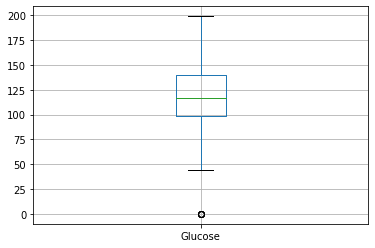

In [18]:
diabetes_df[['Glucose']].boxplot()

<AxesSubplot:xlabel='Glucose'>

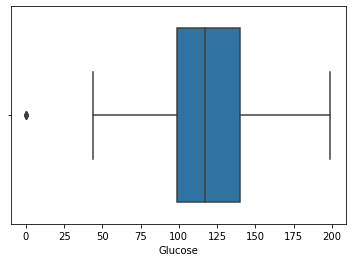

In [19]:
sns.boxplot(diabetes_df['Glucose'])

In [20]:
diabetes_df['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [21]:
q1 = 99.00
q3 = 140.25
iqr = q3 - q1
lower_tail = q1 - (1.5*iqr)
upper_tail = q3 + (1.5*iqr)

In [22]:
mean = diabetes_df['Glucose'].loc[(diabetes_df['Glucose'] >= lower_tail)].mean()
mean

121.6867627785059

In [23]:
diabetes_df['Glucose'].loc[(diabetes_df['Glucose']<lower_tail)] = mean

<AxesSubplot:xlabel='Glucose'>

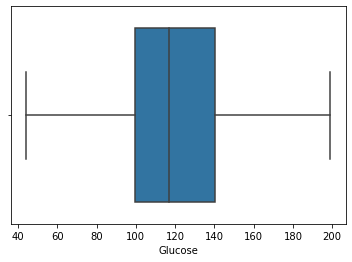

In [24]:
sns.boxplot(diabetes_df['Glucose'])

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

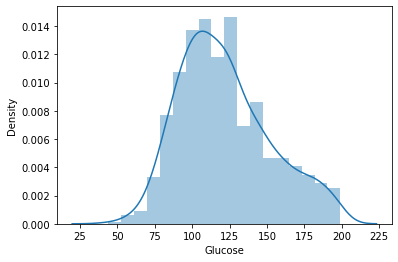

In [25]:
sns.distplot(diabetes_df['Glucose'])

##### 3. BloodPressure

<AxesSubplot:xlabel='BloodPressure'>

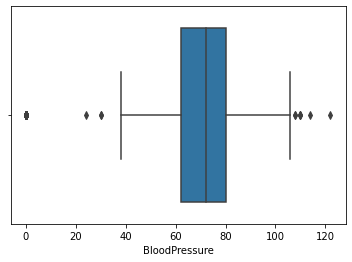

In [26]:
sns.boxplot(diabetes_df['BloodPressure'])

In [27]:
diabetes_df['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [28]:
q1 = 62.00
q3 = 80.00
iqr = q3 - q1
lower_tail = q1 - (1.5*iqr)
upprt_tail = q3 + (1.5*iqr)

In [29]:
mean = diabetes_df['BloodPressure'].loc[(diabetes_df['BloodPressure'] >= lower_tail) & (diabetes_df['BloodPressure'] <= upper_tail)].mean()
mean

72.58767123287672

In [30]:
diabetes_df['BloodPressure'].loc[(diabetes_df['BloodPressure']> upper_tail) | (diabetes_df['BloodPressure'] < lower_tail)] = mean

<AxesSubplot:xlabel='BloodPressure'>

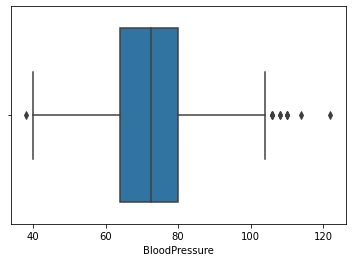

In [31]:
sns.boxplot(diabetes_df['BloodPressure'])

##### 4. SkinThickness

<AxesSubplot:xlabel='SkinThickness'>

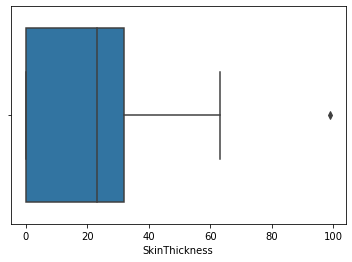

In [32]:
sns.boxplot(diabetes_df['SkinThickness'])

##### 5. Insulin

<AxesSubplot:xlabel='Insulin'>

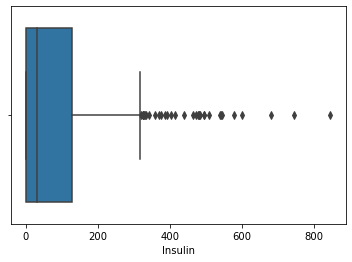

In [33]:
sns.boxplot(diabetes_df['Insulin'])

In [34]:
diabetes_df['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [35]:
q1 = 0.00
q3 = 127.25
iqr = q3 - q1
lower_tail = q1 - (1.5*iqr)
upper_tail = q3 + (1.5*iqr)

In [36]:
mean = diabetes_df['Insulin'].loc[(diabetes_df['Insulin']<= upper_tail)].mean()
mean

62.328337874659404

In [37]:
diabetes_df['Insulin'].loc[(diabetes_df['Insulin']>upper_tail)] = mean

<AxesSubplot:xlabel='Insulin'>

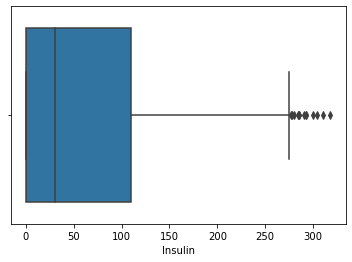

In [38]:
sns.boxplot(diabetes_df['Insulin'])

In [39]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


### Model training and model selection

In [40]:
x = diabetes_df.drop(['Outcome'],axis=1)
y = diabetes_df['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45,stratify=y)

In [41]:
y_train.value_counts()

0    375
1    201
Name: Outcome, dtype: int64

##### 1. Logistic regression

In [42]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [43]:
# training
y_pred_train = logistic_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix : \n",cnf_matrix)
accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy : ",accuracy)
clf_report = classification_report(y_train,y_pred_train)
print("Classification report : \n",clf_report)

Confusion Matrix : 
 [[334  41]
 [ 89 112]]
Accuracy :  0.7743055555555556
Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       375
           1       0.73      0.56      0.63       201

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



In [44]:
# testing
y_pred_test = logistic_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix : \n",cnf_matrix)
accuracy = accuracy_score(y_test,y_pred_test)
print("Accuracy : ",accuracy)
clf_report = classification_report(y_test,y_pred_test)
print("Classification report : \n",clf_report)

Confusion Matrix : 
 [[116   9]
 [ 30  37]]
Accuracy :  0.796875
Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.93      0.86       125
           1       0.80      0.55      0.65        67

    accuracy                           0.80       192
   macro avg       0.80      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192



##### 2. KNN

In [45]:
knn_model = KNeighborsClassifier() # k=5,p=2
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [46]:
# training
y_pred_train = knn_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix : \n",cnf_matrix)
accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy : ",accuracy)
clf_report = classification_report(y_train,y_pred_train)
print("Classification report : \n",clf_report)

Confusion Matrix : 
 [[327  48]
 [ 67 134]]
Accuracy :  0.8003472222222222
Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       375
           1       0.74      0.67      0.70       201

    accuracy                           0.80       576
   macro avg       0.78      0.77      0.78       576
weighted avg       0.80      0.80      0.80       576



In [47]:
# testing
y_pred_test = knn_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix : \n",cnf_matrix)
accuracy = accuracy_score(y_test,y_pred_test)
print("Accuracy : ",accuracy)
clf_report = classification_report(y_test,y_pred_test)
print("Classification report : \n",clf_report)

Confusion Matrix : 
 [[103  22]
 [ 29  38]]
Accuracy :  0.734375
Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       125
           1       0.63      0.57      0.60        67

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192



##### 3. Decision Tree

In [48]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
# training
y_pred_train = dt_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix : \n",cnf_matrix)
accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy : ",accuracy)
clf_report = classification_report(y_train,y_pred_train)
print("Classification report : \n",clf_report)

Confusion Matrix : 
 [[375   0]
 [  0 201]]
Accuracy :  1.0
Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       201

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [50]:
# testing
y_pred_test = dt_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix : \n",cnf_matrix)
accuracy = accuracy_score(y_test,y_pred_test)
print("Accuracy : ",accuracy)
clf_report = classification_report(y_test,y_pred_test)
print("Classification report : \n",clf_report)

Confusion Matrix : 
 [[97 28]
 [29 38]]
Accuracy :  0.703125
Classification report : 
               precision    recall  f1-score   support

           0       0.77      0.78      0.77       125
           1       0.58      0.57      0.57        67

    accuracy                           0.70       192
   macro avg       0.67      0.67      0.67       192
weighted avg       0.70      0.70      0.70       192



###### HyperParameter Tuning for Decision Tree

#### 3.1 RandomSearchCV

In [51]:
hyperpara = {'criterion':['gini','entropy'],
             'max_depth':np.arange(4,7),
             'min_samples_split':np.arange(3,8),
             'min_samples_leaf':np.arange(3,8)}
rdscv_dt = RandomizedSearchCV(dt_model,hyperpara,cv=5)
rdscv_dt.fit(x_train,y_train)
rdscv_dt.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=5)

In [52]:
dt_model_1 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=3)
dt_model_1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=3)

In [53]:
# training
y_pred_train = dt_model_1.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix : \n",cnf_matrix)
accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy : ",accuracy)
clf_report = classification_report(y_train,y_pred_train)
print("Classification report : \n",clf_report)

Confusion Matrix : 
 [[308  67]
 [ 32 169]]
Accuracy :  0.828125
Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       375
           1       0.72      0.84      0.77       201

    accuracy                           0.83       576
   macro avg       0.81      0.83      0.82       576
weighted avg       0.84      0.83      0.83       576



In [54]:
# testing
y_pred_test = dt_model_1.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix : \n",cnf_matrix)
accuracy = accuracy_score(y_test,y_pred_test)
print("Accuracy : ",accuracy)
clf_report = classification_report(y_test,y_pred_test)
print("Classification report : \n",clf_report)

Confusion Matrix : 
 [[104  21]
 [ 30  37]]
Accuracy :  0.734375
Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       125
           1       0.64      0.55      0.59        67

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.73      0.73      0.73       192



#### 3.2 GidSearchCV

In [55]:
hyperpara = {'criterion':['gini','entropy'],
             'max_depth':np.arange(3,7),
             'min_samples_split':np.arange(3,8),
             'min_samples_leaf':np.arange(3,8)}
gscv_dt = GridSearchCV(dt_model,hyperpara,cv=5)
gscv_dt.fit(x_train,y_train)
gscv_dt.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=5)

In [56]:
dt_model_2 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=4)
dt_model_2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=4)

In [57]:
# training
y_pred_train = dt_model_2.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix : \n",cnf_matrix)
accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy : ",accuracy)
clf_report = classification_report(y_train,y_pred_train)
print("Classification report : \n",clf_report)

Confusion Matrix : 
 [[308  67]
 [ 32 169]]
Accuracy :  0.828125
Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       375
           1       0.72      0.84      0.77       201

    accuracy                           0.83       576
   macro avg       0.81      0.83      0.82       576
weighted avg       0.84      0.83      0.83       576



In [58]:
# testing
y_pred_test = dt_model_2.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix : \n",cnf_matrix)
accuracy = accuracy_score(y_test,y_pred_test)
print("Accuracy : ",accuracy)
clf_report = classification_report(y_test,y_pred_test)
print("Classification report : \n",clf_report)

Confusion Matrix : 
 [[104  21]
 [ 30  37]]
Accuracy :  0.734375
Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       125
           1       0.64      0.55      0.59        67

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.73      0.73      0.73       192



##### 4. Random Forest

In [59]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
# training
y_pred_train = rf_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix : \n",cnf_matrix)
accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy : ",accuracy)
clf_report = classification_report(y_train,y_pred_train)
print("Classification report : \n",clf_report)

Confusion Matrix : 
 [[375   0]
 [  0 201]]
Accuracy :  1.0
Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       201

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [61]:
# testing
y_pred_test = rf_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix : \n",cnf_matrix)
accuracy = accuracy_score(y_test,y_pred_test)
print("Accuracy : ",accuracy)
clf_report = classification_report(y_test,y_pred_test)
print("Classification report : \n",clf_report)

Confusion Matrix : 
 [[111  14]
 [ 27  40]]
Accuracy :  0.7864583333333334
Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       125
           1       0.74      0.60      0.66        67

    accuracy                           0.79       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.78      0.79      0.78       192



###### HyperParameters tuning for Random Forest

##### 4.1 GridSearchCV

In [62]:
hyperpara = {'n_estimators':np.arange(2,60),
             'criterion':['gini','entropy'],
             'max_depth':np.arange(3,7),
             'min_samples_split':np.arange(3,8),
             'min_samples_leaf':np.arange(3,8),
             'max_features':["sqrt", "log2"]}
rscv_rf = RandomizedSearchCV(rf_model,hyperpara,cv=5)
rscv_rf.fit(x_train,y_train)
rscv_rf.best_estimator_

RandomForestClassifier(max_depth=6, max_features='log2', min_samples_leaf=5,
                       min_samples_split=6, n_estimators=51)

In [63]:
rf_model_1 = RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2',
                                    min_samples_leaf=7, min_samples_split=7,
                                    n_estimators=16)
rf_model_1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       min_samples_leaf=7, min_samples_split=7,
                       n_estimators=16)

In [64]:
# training
y_pred_train = rf_model_1.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix : \n",cnf_matrix)
accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy : ",accuracy)
clf_report = classification_report(y_train,y_pred_train)
print("Classification report : \n",clf_report)

Confusion Matrix : 
 [[341  34]
 [ 60 141]]
Accuracy :  0.8368055555555556
Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       375
           1       0.81      0.70      0.75       201

    accuracy                           0.84       576
   macro avg       0.83      0.81      0.81       576
weighted avg       0.83      0.84      0.83       576



In [65]:
# testing
y_pred_test = rf_model_1.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix : \n",cnf_matrix)
accuracy = accuracy_score(y_test,y_pred_test)
print("Accuracy : ",accuracy)
clf_report = classification_report(y_test,y_pred_test)
print("Classification report : \n",clf_report)

Confusion Matrix : 
 [[114  11]
 [ 32  35]]
Accuracy :  0.7760416666666666
Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       125
           1       0.76      0.52      0.62        67

    accuracy                           0.78       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.77      0.78      0.76       192



In [66]:
import json
import pickle

In [67]:
data = {'columns':list(x_train.columns)}

In [69]:
with open("random_forest_model.pkl",'wb') as file:
    pickle.dump(rf_model_1,file)
    
with open("project_data.json",'w') as file1:
    json.dump(data,file1)